Step 1:

import original CSV file from https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import pandas as pd
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
print(df)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
100753  2021-06      YISHUN     5 ROOM   820       YISHUN ST 81     01 TO 03   
100754  2021-06      YISHUN  EXECUTIVE   664       YISHUN AVE 4     01 TO 03   
100755  2021-06      YISHUN  EXECUTIVE   277       YISHUN ST 22     01 TO 03   
100756  2021-06      YISHUN  EXECUTIVE   643       YISHUN ST 61     01 TO 03   
100757  2021-06      YISHUN  EXECUTIVE   828       YISHUN ST 81     04 TO 06   

        floor_area_sqm      flat_model 

Step 2: 
Check for any duplicate data in original dataset

In [2]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 100758
Number of rows after discarding duplicates = 100530


Step 3: 

i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [3]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 100530
Number of attributes = 11
Number of missing values:
	month: 0
	town: 0
	flat_type: 0
	block: 0
	street_name: 0
	storey_range: 0
	floor_area_sqm: 0
	flat_model: 0
	lease_commence_date: 0
	remaining_lease: 0
	resale_price: 0


Step 4 : Drop Missing Data if any

In [4]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 100530
Number of rows after discarding missing values = 100530


Step 5 : Remove non-essential columns : month, block, streen_name, flat_model

In [5]:
dfTrim = df_drop_null.drop(['month','block','street_name','flat_model'],axis=1)
dfTrim

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100753,YISHUN,5 ROOM,01 TO 03,121.0,1988,66 years 03 months,541000.0
100754,YISHUN,EXECUTIVE,01 TO 03,181.0,1992,69 years 11 months,868000.0
100755,YISHUN,EXECUTIVE,01 TO 03,152.0,1985,63 years 03 months,585000.0
100756,YISHUN,EXECUTIVE,01 TO 03,146.0,1987,65 years 04 months,600000.0


Step 6 : Removing Outliers

In [6]:
#remove values with zscore >3
from scipy import stats

df1 = dfTrim.loc[dfTrim['town']=='ANG MO KIO'].copy()
df1['z_score'] = stats.zscore(df1['resale_price'])
df1 = df1.loc[df1['z_score'].abs()<=3]

df2 = dfTrim.loc[dfTrim['town']=='BEDOK'].copy()
df2['z_score'] = stats.zscore(df2['resale_price'])
df2 = df2.loc[df2['z_score'].abs()<=3]

df3 = dfTrim.loc[dfTrim['town']=='BISHAN'].copy()
df3['z_score'] = stats.zscore(df3['resale_price'])
df3 = df3.loc[df3['z_score'].abs()<=3]

df4 = dfTrim.loc[dfTrim['town']=='BUKIT BATOK'].copy()
df4['z_score'] = stats.zscore(df4['resale_price'])
df4 = df4.loc[df4['z_score'].abs()<=3]

df5 = dfTrim.loc[dfTrim['town']=='BUKIT MERAH'].copy()
df5['z_score'] = stats.zscore(df5['resale_price'])
df5 = df5.loc[df5['z_score'].abs()<=3]

df6 = dfTrim.loc[dfTrim['town']=='BUKIT PANJANG'].copy()
df6['z_score'] = stats.zscore(df6['resale_price'])
df6 = df6.loc[df6['z_score'].abs()<=3]

df7 = dfTrim.loc[dfTrim['town']=='BUKIT TIMAH'].copy()
df7['z_score'] = stats.zscore(df7['resale_price'])
df7 = df7.loc[df7['z_score'].abs()<=3]

df8 = dfTrim.loc[dfTrim['town']=='CENTRAL AREA'].copy()
df8['z_score'] = stats.zscore(df8['resale_price'])
df8 = df8.loc[df8['z_score'].abs()<=3]

df9 = dfTrim.loc[dfTrim['town']=='CLEMENTI'].copy()
df9['z_score'] = stats.zscore(df9['resale_price'])
df9 = df9.loc[df9['z_score'].abs()<=3]

df10 = dfTrim.loc[dfTrim['town']=='GEYLANG'].copy()
df10['z_score'] = stats.zscore(df10['resale_price'])
df10 = df10.loc[df10['z_score'].abs()<=3]

df11 = dfTrim.loc[dfTrim['town']=='HOUGANG'].copy()
df11['z_score'] = stats.zscore(df11['resale_price'])
df11 = df11.loc[df11['z_score'].abs()<=3]

df12 = dfTrim.loc[dfTrim['town']=='JURONG EAST'].copy()
df12['z_score'] = stats.zscore(df12['resale_price'])
df12 = df12.loc[df12['z_score'].abs()<=3]

df13 = dfTrim.loc[dfTrim['town']=='JURONG WEST'].copy()
df13['z_score'] = stats.zscore(df13['resale_price'])
df13 = df13.loc[df13['z_score'].abs()<=3]

df14 = dfTrim.loc[dfTrim['town']=='KALLANG/WHAMPOA'].copy()
df14['z_score'] = stats.zscore(df14['resale_price'])
df14 = df14.loc[df14['z_score'].abs()<=3]

df15 = dfTrim.loc[dfTrim['town']=='MARINE PARADE'].copy()
df15['z_score'] = stats.zscore(df15['resale_price'])
df15 = df15.loc[df15['z_score'].abs()<=3]

df16 = dfTrim.loc[dfTrim['town']=='PASIR RIS'].copy()
df16['z_score'] = stats.zscore(df16['resale_price'])
df16 = df16.loc[df16['z_score'].abs()<=3]

df17 = dfTrim.loc[dfTrim['town']=='PUNGGOL'].copy()
df17['z_score'] = stats.zscore(df17['resale_price'])
df17 = df17.loc[df17['z_score'].abs()<=3]

df18 = dfTrim.loc[dfTrim['town']=='QUEENSTOWN'].copy()
df18['z_score'] = stats.zscore(df18['resale_price'])
df18 = df18.loc[df18['z_score'].abs()<=3]

df19 = dfTrim.loc[dfTrim['town']=='SEMBAWANG'].copy()
df19['z_score'] = stats.zscore(df19['resale_price'])
df19 = df19.loc[df19['z_score'].abs()<=3]

df20 = dfTrim.loc[dfTrim['town']=='SENGKANG'].copy()
df20['z_score'] = stats.zscore(df20['resale_price'])
df20 = df20.loc[df20['z_score'].abs()<=3]

df21 = dfTrim.loc[dfTrim['town']=='SERANGOON'].copy()
df21['z_score'] = stats.zscore(df21['resale_price'])
df21 = df21.loc[df21['z_score'].abs()<=3]

df22 = dfTrim.loc[dfTrim['town']=='TAMPINES'].copy()
df22['z_score'] = stats.zscore(df22['resale_price'])
df22 = df22.loc[df22['z_score'].abs()<=3]

df23 = dfTrim.loc[dfTrim['town']=='TOA PAYOH'].copy()
df23['z_score'] = stats.zscore(df23['resale_price'])
df23 = df23.loc[df23['z_score'].abs()<=3]

df24 = dfTrim.loc[dfTrim['town']=='WOODLANDS'].copy()
df24['z_score'] = stats.zscore(df24['resale_price'])
df24 = df24.loc[df24['z_score'].abs()<=3]

df25 = dfTrim.loc[dfTrim['town']=='YISHUN'].copy()
df25['z_score'] = stats.zscore(df25['resale_price'])
df25 = df25.loc[df25['z_score'].abs()<=3]

df26 = dfTrim.loc[dfTrim['town']=='CHOA CHU KANG'].copy()
df26['z_score'] = stats.zscore(df26['resale_price'])
df26 = df26.loc[df26['z_score'].abs()<=3]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, 
          df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26]

dfRemoveDup = pd.concat(frames)
dfRemoveDup = dfRemoveDup.drop(columns=['z_score'])
dfRemoveDup.town.unique()

#dfTrim['z_score']=stats.zscore(dfTrim['resale_price'])
#dfRemoveDup = dfTrim.loc[dfTrim['z_score'].abs()<=3]

#can export step6 as cleandataset, as step7 will be classifying and editing data

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'CHOA CHU KANG'], dtype=object)

Step 7 : Classifying 'town' and 'flat_type'

In [7]:
#north=1, northeast=2, central=3, northwest=4, west=5, east=6
replace_town = {'HOUGANG':2, 'WOODLANDS':1, 'BUKIT MERAH':3, 'SENGKANG':2, 
                'CHOA CHU KANG':4, 'JURONG WEST':5, 'BEDOK':6, 'TAMPINES':6, 
                'KALLANG/WHAMPOA':3, 'GEYLANG':3, 'YISHUN':1, 'SERANGOON':2, 
                'QUEENSTOWN':3, 'BISHAN':3, 'PUNGGOL':2, 'ANG MO KIO':2, 
                'TOA PAYOH':3, 'BUKIT BATOK':5, 'CENTRAL AREA':3, 'SEMBAWANG':1, 
                'JURONG EAST':5, 'CLEMENTI':5, 'MARINE PARADE':3, 'PASIR RIS':6, 
                'BUKIT PANJANG':5, 'BUKIT TIMAH':3}

#1room=1, 2room=2, 3room=3, 4room=4, 5room=5, executive=6, multigen=7
replace_ft = {'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, 
              '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7}

dfRemoveDup['town'] = dfRemoveDup['town'].map(replace_town)
dfRemoveDup['flat_type'] = dfRemoveDup['flat_type'].map(replace_ft)

dfClassified = dfRemoveDup.copy()
dfClassified = dfClassified.reset_index()
del dfClassified['index']

dfClassified

#dfRemoveDup['resale_price'] = pd.cut(dfRemoveDup.resale_price, 
#                                     bins=[0,250000,260000,270000,280000,290000,300000,
#                                           310000,320000,330000,340000,350000,360000,370000,380000,390000,400000,
#                                           410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,
#                                           510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,
#                                           610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,np.inf],
#                                     labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
#                                             26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])


,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0


In [8]:
#combinig into single listof tuples
features=list(zip(dfClassified['town'], dfClassified['flat_type'], dfClassified['resale_price']))

label = []
for row in dfClassified.index:
    if (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==1):
        label.append(1)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==2):
        label.append(2)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==3):
        label.append(3)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==4):
        label.append(4)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==5):
        label.append(5)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==6):
        label.append(6)
    elif (dfClassified['town'][row]==1) & (dfClassified['flat_type'][row]==7):
        label.append(7)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==1):
        label.append(8)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==2):
        label.append(9)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==3):
        label.append(10)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==4):
        label.append(11)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==5):
        label.append(12)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==6):
        label.append(13)
    elif (dfClassified['town'][row]==2) & (dfClassified['flat_type'][row]==7):
        label.append(14)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==1):
        label.append(15)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==2):
        label.append(16)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==3):
        label.append(17)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==4):
        label.append(18)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==5):
        label.append(19)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==6):
        label.append(20)
    elif (dfClassified['town'][row]==3) & (dfClassified['flat_type'][row]==7):
        label.append(21)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==1):
        label.append(22)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==2):
        label.append(23)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==3):
        label.append(24)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==4):
        label.append(25)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==5):
        label.append(26)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==6):
        label.append(27)
    elif (dfClassified['town'][row]==4) & (dfClassified['flat_type'][row]==7):
        label.append(28)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==1):
        label.append(29)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==2):
        label.append(30)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==3):
        label.append(31)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==4):
        label.append(32)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==5):
        label.append(33)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==6):
        label.append(34)
    elif (dfClassified['town'][row]==5) & (dfClassified['flat_type'][row]==7):
        label.append(35)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==1):
        label.append(36)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==2):
        label.append(37)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==3):
        label.append(38)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==4):
        label.append(39)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==5):
        label.append(40)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==6):
        label.append(41)
    elif (dfClassified['town'][row]==6) & (dfClassified['flat_type'][row]==7):
        label.append(42)
    else:
        label.append('rip')

dfClassified['label'] = label
dfClassified

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,label
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0,9
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0,10
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0,10
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0,10
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0,10
...,...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0,27
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0,27
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0,27
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0,27


In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(features,label)

#Predict Output
#4,3,230000 -> town=4, flat_type=3, resale_price=230000
predicted= model.predict([[2,2,230000]])
print('Predicted label:', predicted)


Predicted label: [9]


# Data Visualization

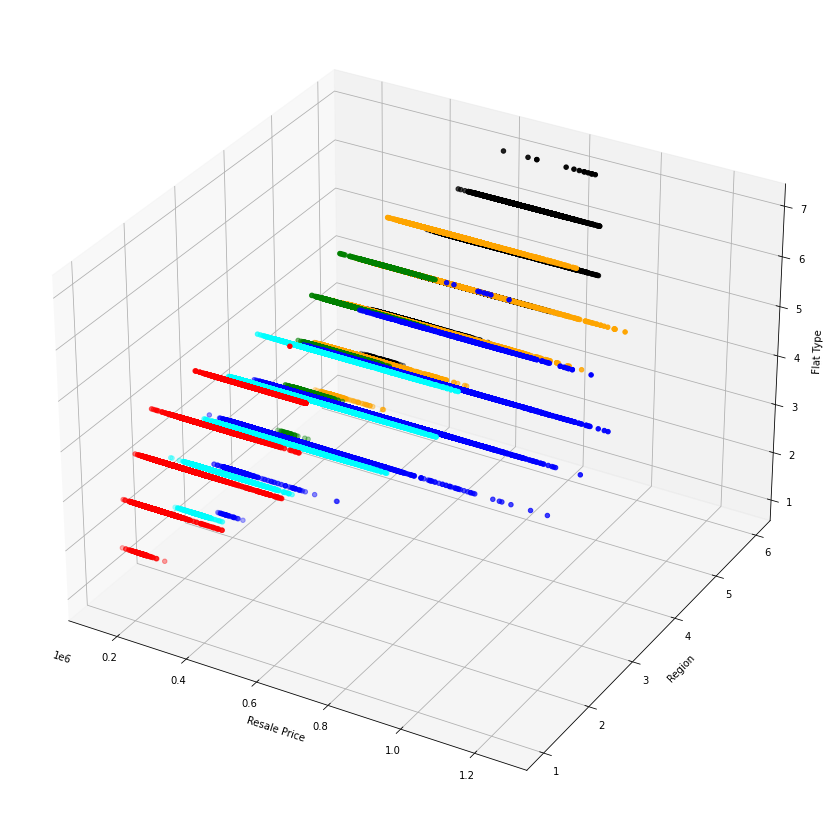

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Resale Price')
ax.set_ylabel('Region')
ax.set_zlabel('Flat Type')

data1 = dfClassified[dfClassified['town']==1]
ax.scatter(data1['resale_price'], data1['town'], data1['flat_type'], color = 'red')

data2 = dfClassified[dfClassified['town']==2]
ax.scatter(data2['resale_price'], data2['town'], data2['flat_type'], color = 'cyan')

data3 = dfClassified[dfClassified['town']==3]
ax.scatter(data3['resale_price'], data3['town'], data3['flat_type'], color = 'blue')

data4 = dfClassified[dfClassified['town']==4]
ax.scatter(data4['resale_price'], data4['town'], data4['flat_type'], color = 'green')

data5 = dfClassified[dfClassified['town']==5]
ax.scatter(data5['resale_price'], data5['town'], data5['flat_type'], color = 'orange')

data6 = dfClassified[dfClassified['town']==6]
ax.scatter(data6['resale_price'], data6['town'], data6['flat_type'], color = 'black')

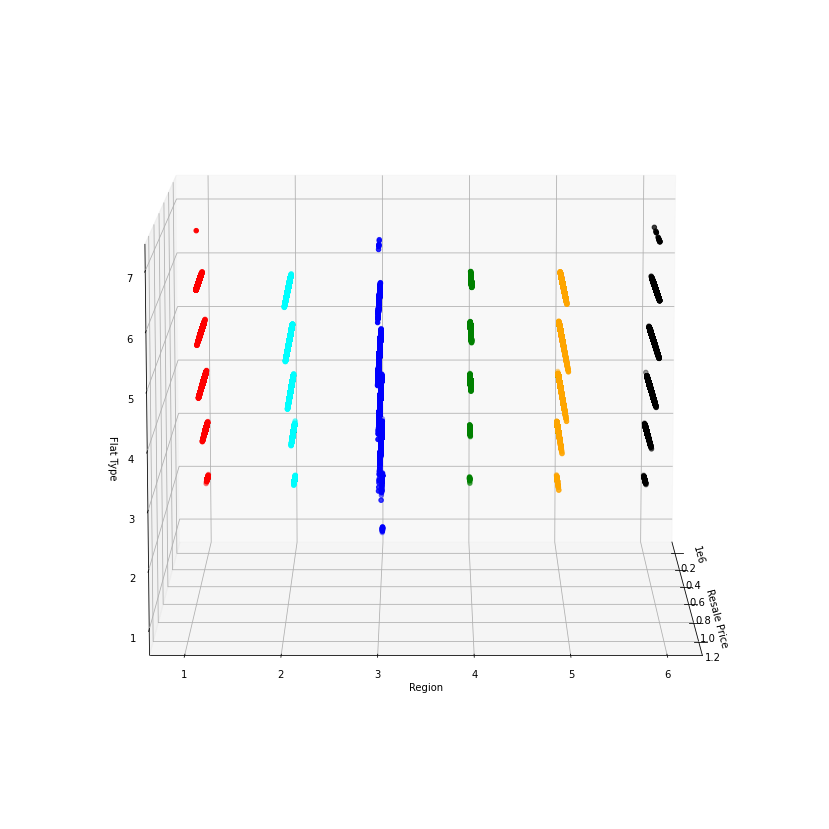

In [11]:
fig = plt.figure(figsize=(15,15))
bx = fig.add_subplot(projection='3d')
bx.set_xlabel('Resale Price')
bx.set_ylabel('Region')
bx.set_zlabel('Flat Type')

data1 = dfClassified[dfClassified['town']==1]
bx.scatter(data1['resale_price'], data1['town'], data1['flat_type'], color = 'red')

data2 = dfClassified[dfClassified['town']==2]
bx.scatter(data2['resale_price'], data2['town'], data2['flat_type'], color = 'cyan')

data3 = dfClassified[dfClassified['town']==3]
bx.scatter(data3['resale_price'], data3['town'], data3['flat_type'], color = 'blue')

data4 = dfClassified[dfClassified['town']==4]
bx.scatter(data4['resale_price'], data4['town'], data4['flat_type'], color = 'green')

data5 = dfClassified[dfClassified['town']==5]
bx.scatter(data5['resale_price'], data5['town'], data5['flat_type'], color = 'orange')

data6 = dfClassified[dfClassified['town']==6]
bx.scatter(data6['resale_price'], data6['town'], data6['flat_type'], color = 'black')

bx.view_init(elev=10, azim=0)

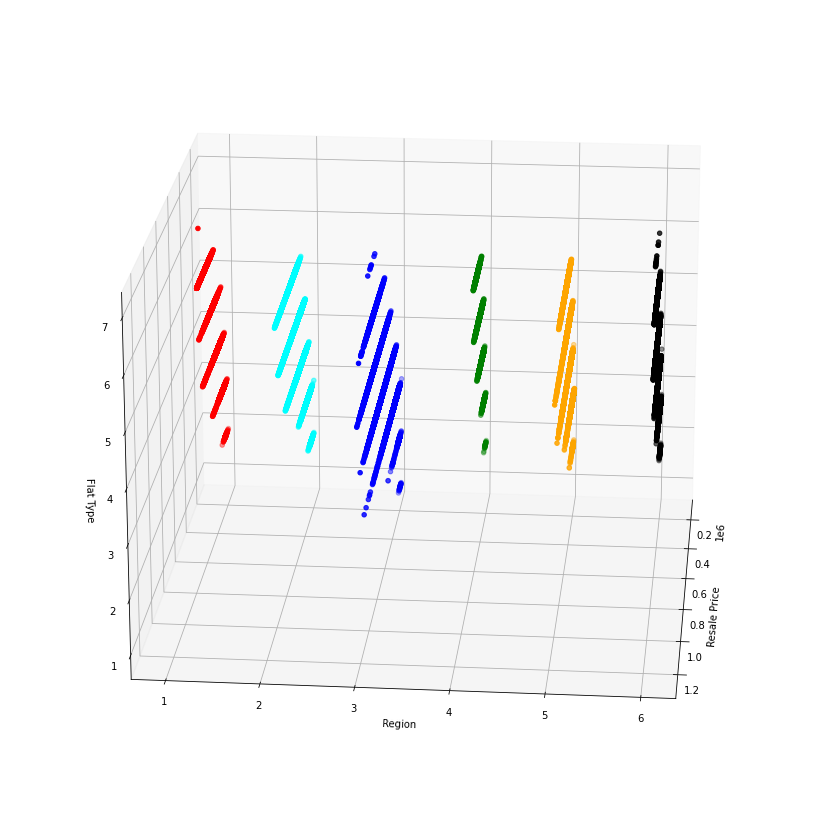

In [12]:
fig = plt.figure(figsize=(15,15))
cx = fig.add_subplot(projection='3d')

cx.set_xlabel('Resale Price')
cx.set_ylabel('Region')
cx.set_zlabel('Flat Type')

data1 = dfClassified[dfClassified['town']==1]
cx.scatter(data1['resale_price'], data1['town'], data1['flat_type'], color = 'red')

data2 = dfClassified[dfClassified['town']==2]
cx.scatter(data2['resale_price'], data2['town'], data2['flat_type'], color = 'cyan')

data3 = dfClassified[dfClassified['town']==3]
cx.scatter(data3['resale_price'], data3['town'], data3['flat_type'], color = 'blue')

data4 = dfClassified[dfClassified['town']==4]
cx.scatter(data4['resale_price'], data4['town'], data4['flat_type'], color = 'green')

data5 = dfClassified[dfClassified['town']==5]
cx.scatter(data5['resale_price'], data5['town'], data5['flat_type'], color = 'orange')

data6 = dfClassified[dfClassified['town']==6]
cx.scatter(data6['resale_price'], data6['town'], data6['flat_type'], color = 'black')

cx.view_init(elev=20, azim=5)

# Calculations

In [13]:
from pandas.api.types import is_numeric_dtype

for col in dfClassified:
    if is_numeric_dtype(dfClassified[col]):
        print('%s:' %(col))
        print('\t Mean = %.2f' %dfClassified[col].mean())
        print('\t Standard deviation = %.2f' %dfClassified[col].std())
        print('\t Minimum = %.2f' %dfClassified[col].min())
        print('\t Maximum = %.2f' %dfClassified[col].max())

town:
	 Mean = 3.30
	 Standard deviation = 1.73
	 Minimum = 1.00
	 Maximum = 6.00
flat_type:
	 Mean = 4.14
	 Standard deviation = 0.92
	 Minimum = 1.00
	 Maximum = 7.00
floor_area_sqm:
	 Mean = 97.57
	 Standard deviation = 23.93
	 Minimum = 31.00
	 Maximum = 249.00
lease_commence_date:
	 Mean = 1994.68
	 Standard deviation = 13.22
	 Minimum = 1966.00
	 Maximum = 2019.00
resale_price:
	 Mean = 448411.47
	 Standard deviation = 154988.35
	 Minimum = 140000.00
	 Maximum = 1258000.00
label:
	 Mean = 20.21
	 Standard deviation = 12.17
	 Minimum = 2.00
	 Maximum = 42.00


In [14]:
print("\nCovariance:")
dfClassified.cov()


Covariance:


,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,label
town,2.994461,0.034711,2.873005e+00,-4.610504,1.604044e+04,20.995936
flat_type,0.034711,0.848416,2.099661e+01,2.791568,9.056705e+04,1.091390
floor_area_sqm,2.873005,20.996607,5.727783e+02,52.443356,2.304914e+06,41.107643
lease_commence_date,-4.610504,2.791568,5.244336e+01,174.838840,7.005465e+05,-29.481961
resale_price,16040.436980,90567.050146,2.304914e+06,700546.515491,2.402139e+10,202850.109005
label,20.995936,1.091390,4.110764e+01,-29.481961,2.028501e+05,148.062939


In [15]:
print("\nCorrelation:")
dfClassified.corr()


Correlation:


,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,label
town,1.000000,0.021777,0.069372,-0.201498,0.059808,0.997132
flat_type,0.021777,1.000000,0.952470,0.229205,0.634405,0.097376
floor_area_sqm,0.069372,0.952470,1.000000,0.165721,0.621387,0.141158
lease_commence_date,-0.201498,0.229205,0.165721,1.000000,0.341837,-0.183237
resale_price,0.059808,0.634405,0.621387,0.341837,1.000000,0.107561
label,0.997132,0.097376,0.141158,-0.183237,0.107561,1.000000
